# 🚢 Titanic Survival Prediction Using Decision Tree

This project uses the Titanic dataset to build a Decision Tree model that predicts passenger survival. We will preprocess the data, train the model, evaluate its performance, and visualize key metrics.

### Objectives:
- Understand key features impacting survival
- Train a Decision Tree Classifier
- Evaluate the model with various metrics and visualizations

## 🔧 Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## 📊 Loading and Exploring the Dataset

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🧹 Data Cleaning and Preprocessing

In [3]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## 📈 Exploratory Data Analysis

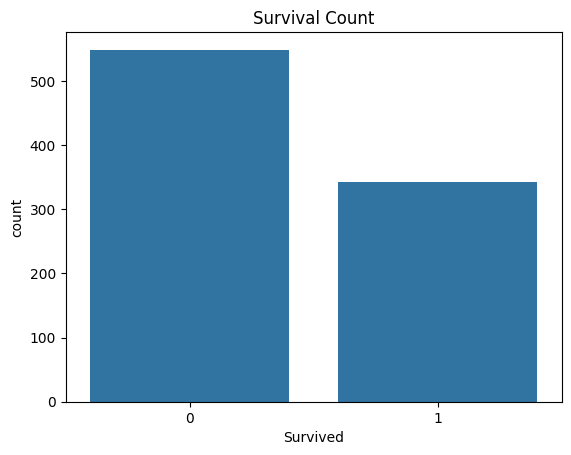

In [5]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

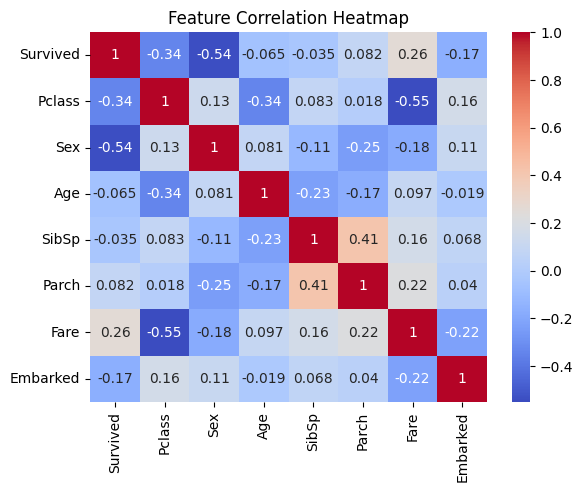

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## ✂️ Splitting Data for Training and Testing

In [7]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 🤖 Model Training - Decision Tree

In [8]:
model = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=11, min_samples_leaf=11)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=11, random_state=100)

## ✅ Model Evaluation

In [9]:
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7873134328358209

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       165
           1       0.79      0.60      0.69       103

    accuracy                           0.79       268
   macro avg       0.79      0.75      0.76       268
weighted avg       0.79      0.79      0.78       268



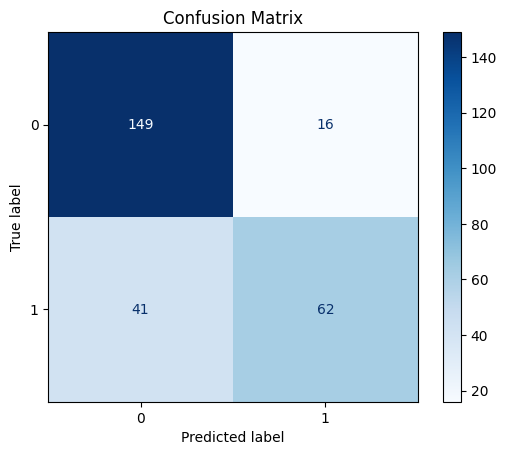

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## 🔍 Feature Importance

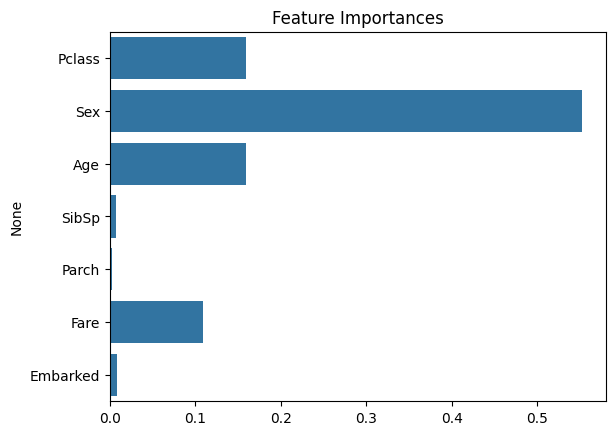

In [11]:
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()

## 📝 Conclusion

The Decision Tree model performed reasonably well with an accuracy around the 80% mark. The most important features influencing survival include `Sex`, `Fare`, and `Pclass`. Future improvements could include hyperparameter tuning or testing other models like Random Forest or Logistic Regression.